In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
import random
seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
data=pd.read_csv("boston_housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
x=data.drop(columns=["MEDV"])
y=data["MEDV"].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(13,),name='input-layer'),
    tf.keras.layers.Dense(128,activation='relu',name='hidden-layer-1'),
    tf.keras.layers.BatchNormalization(name='batch-normalization-1'),
    tf.keras.layers.Dropout(0.2,name='dropout-layer-1'),
    tf.keras.layers.Dense(64,activation='relu',name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='batch-normalization-2'),
    tf.keras.layers.Dropout(0.2,name='dropout-layer-2'),
    tf.keras.layers.Dense(1,name='output-layer')
])

In [11]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [12]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 572.4227 - val_loss: 526.4896
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 536.5261 - val_loss: 518.1606
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 526.6173 - val_loss: 509.1661
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 514.1615 - val_loss: 499.9727
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 503.0935 - val_loss: 489.6553
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 494.0581 - val_loss: 479.0054
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482.4510 - val_loss: 468.5023
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 472.0633 - val_loss: 454.1937
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 459.5397 - val_loss: 442.6596
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 446.2734 - val_loss: 429.3498
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 433.8377 - val_loss: 414.0482
Epoch 12/100
13

In [13]:
y_pred=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-1 (Dense)          │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch-normalization-1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout-layer-1 (Dropout)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch-normalization-2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout-layer-2 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,877 (124.52 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 20,996 (82.02 KB)

In [15]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [16]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 9.514368552203988
Root Mean Squared Error (RMSE): 3.084537007753998
R² Score: 0.8702594064811358
Mean Absolute Error (MAE): 2.056663646884993


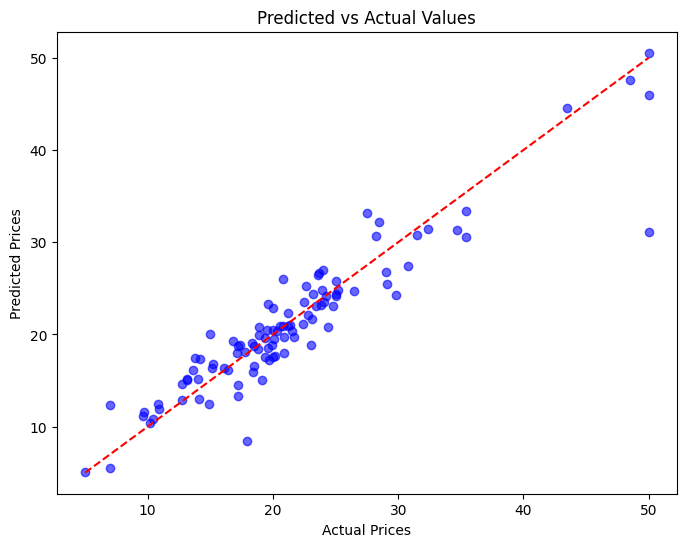

In [17]:
import matplotlib.pyplot as plt
# Plotting predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

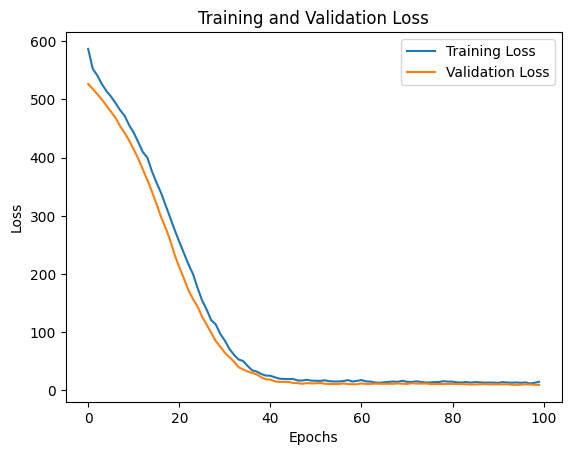

In [18]:
# Plotting training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)   # Very important!
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)
# --- Assume scaler was already trained during your model training ---
# You must load or reuse the already fitted scaler
# Example: if you already fitted on X_train -> scaler.fit(X_train)
# Here we are assuming you already have the 'scaler' ready

# --- Feature names (change if your dataset is different) ---
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# --- User Input for House Features ---
print("\nPlease enter the following details to predict the house price:")

user_input = []
for feature in feature_names:
    value = float(input(f"Enter value for {feature}: "))
    user_input.append(value)

# Convert input to numpy array and reshape
user_input = np.array(user_input).reshape(1, -1)

# --- Initialize scaler (only if needed) ---
# Normally, scaler should already be fitted on your training data
# scaler = StandardScaler()
# scaler.fit(X_train)  # Don't re-fit here, just reuse fitted scaler

# --- Scale the user input ---
user_input_scaled = scaler.transform(user_input)  # 🔥 Very important

# --- Predict using the trained model ---
predicted_price = model.predict(user_input_scaled)

# --- Show the Prediction ---
print(f"\n🏠 Predicted House Price: ${predicted_price[0][0]*1000:.2f}")
0


Please enter the following details to predict the house price:
Enter value for CRIM: 0.02
Enter value for ZN: 18
Enter value for INDUS: 2.31
Enter value for CHAS: 0
Enter value for NOX: 5.32
Enter value for RM: 6.5
Enter value for AGE: 65
Enter value for DIS: 4.0
Enter value for RAD: 1
Enter value for TAX: 296
Enter value for PTRATIO: 15.3
Enter value for B: 396
Enter value for LSTAT: 4.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

🏠 Predicted House Price: $488973.47


0